#### Author : Roberto Berwa, MIT 
#### Topic : Covid-19 Analysis
#### Lang : Julia
#### Date : 04/08/2021

# I. Setup

In [255]:
using Plots
using Dates 
using DataFrames
using Interact
using CSV

In [256]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv";

In [257]:
download(url,"covid_data.csv")

"covid_data.csv"

In [258]:
data = CSV.read("covid_data.csv");

# II. Data manipulation

In [259]:
data = rename(data, 1 =>"Province", 2 => "Country") # Renaming columns

,Province,Country,Lat,Long,1/22/20
,String⍰,String,Float64,Float64,Int64
1,missing,Afghanistan,33.0,65.0,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [260]:
all_countries = unique(data[1:end, 2])

184-element Array{String,1}:
 "Afghanistan"          
 "Albania"              
 "Algeria"              
 "Andorra"              
 "Angola"               
 "Antigua and Barbuda"  
 "Argentina"            
 "Armenia"              
 "Australia"            
 "Austria"              
 "Azerbaijan"           
 "Bahamas"              
 "Bahrain"              
 ⋮                      
 "Mali"                 
 "Saint Kitts and Nevis"
 "Kosovo"               
 "Burma"                
 "MS Zaandam"           
 "Botswana"             
 "Burundi"              
 "Sierra Leone"         
 "Malawi"               
 "South Sudan"          
 "Western Sahara"       
 "Sao Tome and Principe"

In [261]:
countries = ["US", "China", "Japan", "Korea, South", "United Kingdom", "France", "Germany"] #country study focus

7-element Array{String,1}:
 "US"            
 "China"         
 "Japan"         
 "Korea, South"  
 "United Kingdom"
 "France"        
 "Germany"       

In [262]:
num_days = length(data[1, 5:end])

78

In [263]:
data_country_dict = Dict()
for i in 1:length(countries)
    d = aggregate(data[data.Country .== countries[i], 5: end], sum)[1,:]
    data_country_dict[countries[i]] = convert(Vector, d)
end

# III. Data Visualization 

#### Fig 1: Confirmed Cases around the world per day 

In [264]:
@manipulate for day in slider(1:num_days, value=1)
    p = plot(xlim=(0, num_days+5), ylim=(0,400000))
    for country in keys(data_country_dict) 
    plot!(data_country_dict[country][1:day], label = country, leg=:topleft, m=:o) 
    end 
    xlabel!("days")
    ylabel!("Confirmed Cases")
    title!("Confirmed Cases around the world") 
    p 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 78,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/robertoberwa/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/robertoberwa/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/robertoberwa/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/robertoberwa/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/robertoberwa/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000113ab9b10, Task (runnable) @0x0000000113ab9b10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"

##### Fig 1: Confirmed Cases around the world

### Checking Exponential Growth

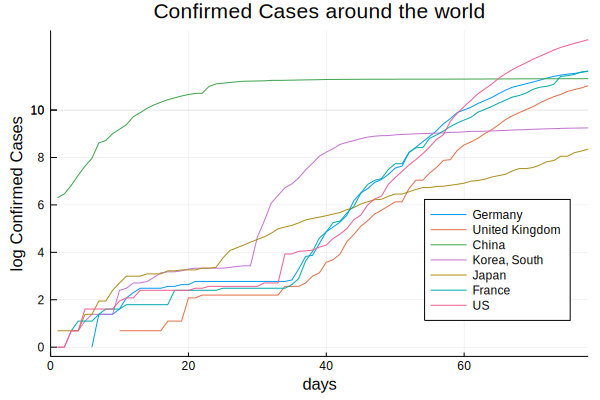

In [265]:
log_data_country_dict = Dict()
for (key, value) in data_country_dict
    value = convert(Array{Float64}, value)
    value[value .== 0.0] .= NaN
    log_data_country_dict[key] = log.(value)
end

 plog = plot(xlim=(0, num_days))

for country in keys(log_data_country_dict)
    plot!(log_data_country_dict[country], label = country, leg=:bottomright)
end
xlabel!("days")
ylabel!("log Confirmed Cases")
title!("Confirmed Cases around the world")
plog

###### Fig 2: log confirmed cases per day

##### From this fig 2, all the seven countries experiences exponential growth.

# Visualizing changes

In [266]:
weekly_data = Dict()
final = 0
for country in countries
    country_data = data_country_dict[country]
    country_data = convert(Array{Float64}, country_data)
    country_data[country_data .== 0.0] .= NaN
    country_data_weekly = []
    for i in num_days:-1:1 # Monday to Monday 
        if i <= 7
            append!(country_data_weekly, country_data[i])
        else
            append!(country_data_weekly, [country_data[i] - country_data[i-7]]) #Format: Sunday to Sunday
            end 
        end 
    weekly_data[country] = reverse(country_data_weekly)
    end
weekly_data

Dict{Any,Any} with 7 entries:
  "Germany"        => Any[NaN, NaN, NaN, NaN, NaN, 1.0, 4.0, NaN, NaN, NaN  …  …
  "United Kingdom" => Any[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  …
  "China"          => Any[548.0, 643.0, 920.0, 1406.0, 2075.0, 2877.0, 5509.0, …
  "Korea, South"   => Any[1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 3.0, 3.0, 9.0  …  …
  "Japan"          => Any[2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 7.0, 5.0, 9.0, 13.0  … …
  "France"         => Any[NaN, NaN, 2.0, 3.0, 3.0, 3.0, 4.0, NaN, NaN, 3.0  …  …
  "US"             => Any[1.0, 1.0, 2.0, 2.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0  …  …

In [273]:
@manipulate for day in slider(1:num_days, value=1)
    s = plot(xlim = (0, 20), ylim = (0, 20))
    for country in countries
        y = log.(weekly_data[country][1:day])
        x = log.(data_country_dict[country][1:day])
        plot!(x, y, label = country, leg=:topleft)
        #scatter!(x[day], y[day])
        annotate!(x[day], y[day], text(country, 10, :black))
        end
    xlabel!("Total cases")
    ylabel!("Recent cases")
    title!("Confirmed Cases around the world")
    end   
    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 78,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/robertoberwa/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/robertoberwa/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/robertoberwa/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/robertoberwa/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/robertoberwa/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000113abbcd0, Task (runnable) @0x0000000113abbcd0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"